## Chargement des packages 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

## Importation des données

In [2]:
#Importation des données 
df = pd.read_csv('C:/Users/Admin/Documents/Scoring/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status','occupation','relationship',
             'race','sex','capital_gain','capital_loss','hours_per_week','country','income']
df.head(10)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [3]:
#Ajout d'une colonne index
ind = range(1, len(df) + 1)
ind = pd.DataFrame(ind)
ind.columns = ['index']
ind

#On ajoute cette colonne à notre dataset de base
df =(pd.concat([ind, df], axis=1))

## Information sur le dataset

In [4]:
#Info sur le dataset : type des variables et valeurs manqauntes 
df.info()
#On constate qu'il n'y a pas de valeurs manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   index           32561 non-null  int64 
 1   age             32561 non-null  int64 
 2   workclass       32561 non-null  object
 3   fnlwgt          32561 non-null  int64 
 4   education       32561 non-null  object
 5   education_num   32561 non-null  int64 
 6   marital_status  32561 non-null  object
 7   occupation      32561 non-null  object
 8   relationship    32561 non-null  object
 9   race            32561 non-null  object
 10  sex             32561 non-null  object
 11  capital_gain    32561 non-null  int64 
 12  capital_loss    32561 non-null  int64 
 13  hours_per_week  32561 non-null  int64 
 14  country         32561 non-null  object
 15  income          32561 non-null  object
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
#Description des variables quantitatives du dataset
df.describe()

,index,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,16281.000000,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,9399.695394,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,1.000000,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,8141.000000,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,16281.000000,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,24421.000000,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,32561.000000,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Statistiques descriptives

In [6]:
#Répartition pour la variable 'education' qui correspond au diplôme
df.groupby('education').education_num.describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,933.0,6.0,0.0,6.0,6.0,6.0,6.0,6.0
11th,1175.0,7.0,0.0,7.0,7.0,7.0,7.0,7.0
12th,433.0,8.0,0.0,8.0,8.0,8.0,8.0,8.0
1st-4th,168.0,2.0,0.0,2.0,2.0,2.0,2.0,2.0
5th-6th,333.0,3.0,0.0,3.0,3.0,3.0,3.0,3.0
7th-8th,646.0,4.0,0.0,4.0,4.0,4.0,4.0,4.0
9th,514.0,5.0,0.0,5.0,5.0,5.0,5.0,5.0
Assoc-acdm,1067.0,12.0,0.0,12.0,12.0,12.0,12.0,12.0
Assoc-voc,1382.0,11.0,0.0,11.0,11.0,11.0,11.0,11.0


## Répartition pour les variables quantitatives âge et hours_per_week

In [7]:
#Réparition de l'âge
rep_age = pd.DataFrame(df['age'].value_counts())
rep_age = rep_age.sort_index()
rep_age['volume'] = round(100*(rep_age.age/ rep_age.age.sum()),2)
print(rep_age.to_string())

    age  volume
17  395    1.21
18  550    1.69
19  712    2.19
20  753    2.31
21  720    2.21
22  765    2.35
23  877    2.69
24  798    2.45
25  841    2.58
26  785    2.41
27  835    2.56
28  867    2.66
29  813    2.50
30  861    2.64
31  888    2.73
32  828    2.54
33  875    2.69
34  886    2.72
35  876    2.69
36  898    2.76
37  858    2.64
38  827    2.54
39  816    2.51
40  794    2.44
41  808    2.48
42  780    2.40
43  770    2.36
44  724    2.22
45  734    2.25
46  737    2.26
47  708    2.17
48  543    1.67
49  577    1.77
50  602    1.85
51  595    1.83
52  478    1.47
53  464    1.43
54  415    1.27
55  419    1.29
56  366    1.12
57  358    1.10
58  366    1.12
59  355    1.09
60  312    0.96
61  300    0.92
62  258    0.79
63  230    0.71
64  208    0.64
65  178    0.55
66  150    0.46
67  151    0.46
68  120    0.37
69  108    0.33
70   89    0.27
71   72    0.22
72   67    0.21
73   64    0.20
74   51    0.16
75   45    0.14
76   46    0.14
77   29    0.09
78   23 

Observons le profil des personnes de moins de 17 ans

In [8]:
contTable = pd.crosstab(df['age'],df['income'])
print(contTable.to_string())

income   <=50K   >50K
age                  
17         395      0
18         550      0
19         710      2
20         753      0
21         717      3
22         752     13
23         865     12
24         767     31
25         788     53
26         722     63
27         754     81
28         748    119
29         679    134
30         690    171
31         705    183
32         639    189
33         684    191
34         643    243
35         659    217
36         635    263
37         566    292
38         545    282
39         538    278
40         526    268
41         529    279
42         510    270
43         497    273
44         443    281
45         446    288
46         445    292
47         420    288
48         326    217
49         371    206
50         341    261
51         353    242
52         286    192
53         275    189
54         242    173
55         273    146
56         248    118
57         227    131
58         244    122
59         222    133
60        

Rien de déconnant avec l'âge des personnes ayant 17 ans on va donc les garder pour notre étude, aucun d'entre eux ne gagne plus de 50K

In [9]:
# Detection des valeurs aberrantes avec la méthode du Z score
mean = np.mean(df.age)
std = np.std(df.age)

threshold = 3
outlier = []
for i in df.age:
    z = (i-mean)/std
    if z > threshold:
        outlier.append(i)
print('les outliers sont les âges suivants : ', outlier)


les outliers sont les âges suivants :  [90, 80, 81, 90, 88, 90, 90, 80, 90, 81, 82, 81, 80, 83, 90, 90, 81, 90, 90, 80, 90, 90, 84, 90, 80, 90, 81, 83, 84, 81, 85, 82, 80, 90, 90, 90, 84, 80, 90, 90, 84, 90, 90, 90, 90, 82, 81, 90, 84, 81, 82, 81, 80, 90, 80, 84, 82, 90, 84, 90, 83, 81, 80, 80, 80, 90, 90, 80, 90, 90, 81, 83, 82, 90, 90, 81, 80, 80, 90, 80, 82, 85, 80, 90, 81, 80, 81, 82, 88, 90, 82, 88, 84, 83, 86, 90, 90, 82, 83, 81, 90, 80, 81, 84, 84, 90, 80, 81, 81, 81, 90, 87, 90, 80, 80, 82, 90, 90, 85, 82, 81]


Pour pallier au problème des valeurs extrême on va créer des classes d'âge, ainsi l'effet des valeurs extrême sera diminué et on évite la perte d'information

In [10]:
rep_hours = pd.DataFrame(df['hours_per_week'].value_counts())
rep_hours = rep_hours.sort_index()
rep_hours['volume'] = round(100*(rep_hours.hours_per_week/ rep_hours.hours_per_week.sum()),2)
print(rep_hours.to_string())

    hours_per_week  volume
1               20    0.06
2               32    0.10
3               39    0.12
4               54    0.17
5               60    0.18
6               64    0.20
7               26    0.08
8              145    0.45
9               18    0.06
10             278    0.85
11              11    0.03
12             173    0.53
13              23    0.07
14              34    0.10
15             404    1.24
16             205    0.63
17              29    0.09
18              75    0.23
19              14    0.04
20            1224    3.76
21              24    0.07
22              44    0.14
23              21    0.06
24             252    0.77
25             674    2.07
26              30    0.09
27              30    0.09
28              86    0.26
29               7    0.02
30            1149    3.53
31               5    0.02
32             266    0.82
33              39    0.12
34              28    0.09
35            1297    3.98
36             220    0.68
3

Observons le profil des personnes qui travaillent moins de 15h par semaine et ceux qui travaillent plus de 70h

In [11]:
contTable = pd.crosstab(df['hours_per_week'],df['income'])
print(contTable.to_string())

income           <=50K   >50K
hours_per_week               
1                   18      2
2                   24      8
3                   38      1
4                   51      3
5                   53      7
6                   56      8
7                   22      4
8                  134     11
9                   17      1
10                 258     20
11                  11      0
12                 161     12
13                  21      2
14                  32      2
15                 389     15
16                 192     13
17                  28      1
18                  68      7
19                  14      0
20                1146     78
21                  22      2
22                  40      4
23                  21      0
24                 229     23
25                 639     35
26                  26      4
27                  29      1
28                  81      5
29                   6      1
30                1066     83
31                   5      0
32        

Beaucoup de profil différent, des gens qui travaillent 99 heures par semaine pour gagner moins de 50K et des personnes qui travaillent 1 heure par semaine pour plus de 50K uniquement avec un diplôme de fin de lycée.

Pour pallier à ce problème de valeur aberrante on va créer des classes 

## Variables capital_gain et capital_loss

In [12]:
rep_loss = pd.DataFrame(df['capital_loss'].value_counts())
rep_loss = rep_loss.sort_index()
rep_loss['volume'] = round(100*(rep_loss.capital_loss/ rep_loss.capital_loss.sum()),2)
print(rep_loss.to_string())

      capital_loss  volume
0            31042   95.33
155              1    0.00
213              4    0.01
323              3    0.01
419              3    0.01
625             12    0.04
653              3    0.01
810              2    0.01
880              6    0.02
974              2    0.01
1092             7    0.02
1138             2    0.01
1258             4    0.01
1340             7    0.02
1380             7    0.02
1408            21    0.06
1411             1    0.00
1485            51    0.16
1504            18    0.06
1539             1    0.00
1564            25    0.08
1573             6    0.02
1579            20    0.06
1590            40    0.12
1594             8    0.02
1602            47    0.14
1617             9    0.03
1628            15    0.05
1648             2    0.01
1651             9    0.03
1668             4    0.01
1669            24    0.07
1672            34    0.10
1719            22    0.07
1721            18    0.06
1726             4    0.01
1

In [13]:
rep_gain = pd.DataFrame(df['capital_gain'].value_counts())
rep_gain = rep_gain.sort_index()
rep_gain['volume'] = round(100*(rep_gain.capital_gain/ rep_gain.capital_gain.sum()),2)
print(rep_gain.to_string())

       capital_gain  volume
0             29849   91.67
114               6    0.02
401               2    0.01
594              34    0.10
914               8    0.02
991               5    0.02
1055             25    0.08
1086              4    0.01
1111              1    0.00
1151              8    0.02
1173              3    0.01
1409              7    0.02
1424              3    0.01
1455              1    0.00
1471              7    0.02
1506             15    0.05
1639              1    0.00
1797              7    0.02
1831              7    0.02
1848              6    0.02
2009              3    0.01
2036              4    0.01
2050              5    0.02
2062              2    0.01
2105              9    0.03
2174             48    0.15
2176             23    0.07
2202             16    0.05
2228              5    0.02
2290              5    0.02
2329              6    0.02
2346              6    0.02
2354             11    0.03
2387              1    0.00
2407             19 

On va transformer ces 2 variables en variable quali, pour pouvoir les exploiter, et gommer l'effet des valeurs extrême.

In [14]:
df[df.capital_gain > 0 ].income.value_counts()

 >50K     1677
 <=50K    1035
Name: income, dtype: int64

## Répartion des variables qualitatives 

In [15]:
#Fréquence d'apparition des différentes modalités des variables qualitatives
#C'est à dire les variables de type 'object'

#Copie du dataset de base en ne gardant que les variables du type 'object'
df_object = df.select_dtypes(include=['object']).copy()
df_object.columns


Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'country', 'income'],
      dtype='object')

In [16]:
#Fréquence d'apparition de chaque modalité pour les variables qualitatives
for col in list(df_object.columns):
    print('la variable ' + col +' a '+ str(df_object[col].nunique()) +' modalités :\n ')
    print(df[col].value_counts(normalize=False).map(str) + ' soit: '+round(df[col].value_counts(normalize=True)*100,2).map(str)+'%')
    print('\n')

la variable workclass a 9 modalités :
 
 Private             22696 soit: 69.7%
 Self-emp-not-inc      2541 soit: 7.8%
 Local-gov            2093 soit: 6.43%
 ?                    1836 soit: 5.64%
 State-gov            1298 soit: 3.99%
 Self-emp-inc         1116 soit: 3.43%
 Federal-gov           960 soit: 2.95%
 Without-pay            14 soit: 0.04%
 Never-worked            7 soit: 0.02%
Name: workclass, dtype: object


la variable education a 16 modalités :
 
 HS-grad         10501 soit: 32.25%
 Some-college     7291 soit: 22.39%
 Bachelors        5355 soit: 16.45%
 Masters           1723 soit: 5.29%
 Assoc-voc         1382 soit: 4.24%
 11th              1175 soit: 3.61%
 Assoc-acdm        1067 soit: 3.28%
 10th               933 soit: 2.87%
 7th-8th            646 soit: 1.98%
 Prof-school        576 soit: 1.77%
 9th                514 soit: 1.58%
 12th               433 soit: 1.33%
 Doctorate          413 soit: 1.27%
 5th-6th            333 soit: 1.02%
 1st-4th            168 soit: 0

### Quesqu'on peut remarqué avec cette distribution des modalités par varibables ? 

Les 3 quarts des individus gagnent moins de 50K par an
la quasi totalité des individus viennent des USA (environs 90%) : il serai peut-être plus judicieux de réaliser l'étude uniquement sur les Américains 
Les 2 tiers des individus sont des hommes 
85% de personnes blanches
46% de personnes mariés, 32% qui ne le sont pas et 14% de divorcés
70% travaillent pour le privé, 6% pour le gouvernement

Certaines modalités sont très peu présentes, il semble donc nécessaire de procéder à des regroupement voir à supprimer les observations ayant ces modalités 

In [17]:
df['country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [18]:
#La plus part de nos observations concernent des personnes vivant au Etat-Unis, l'étude portera donc
#Uniquement sur les personnes vivant au USA
#df_2 = df.query('country ==  " United-States"')
df_2 = df


## Valeurs manquantes et aberrantes
les valeurs manquantes dans notre dataset sont marqué par la modalité '?' pour les variables qualitatives :
    - 1659 (5.64%) pour la variable workclass
    - 1666 (5.66%) pour la variable occupation 
    
Au total il y 3325 valeurs manquantes soit environs 10% -> On va supprimer ces observatrion pour éviter tout problèmes


Pas de valeurs aberrantes (pesner à regarder les variables capital_gain et capital_loss)

In [19]:
#Copie du dataset
df_3 = df_2.copy()

In [20]:
#Suppresion des valeurs manquantes
df_3.drop(df_3[df_3['workclass'] ==' ?'].index, inplace = True)
df_3.drop(df_3[df_3['occupation'] ==' ?'].index, inplace = True)
df_3.drop(df_3[df_3['country'] ==' ?'].index, inplace = True)
len(df_3)

30162

## Regroupement des variables 

In [21]:
# Regroupement de la variable âge
# On s'aide des Quartile et de la médiane pour les déterminer 
df_3.loc[df['age'] <= 28,'age'] = '17-28 ans'
df_3.loc[(df['age'] >= 29) & (df['age'] <= 37),'age'] = '29-37 ans'
df_3.loc[(df['age'] >= 38) & (df['age'] <= 48),'age'] = '38-48 ans'
df_3.loc[(df['age'] >= 49) & (df['age'] <= 60),'age'] = '49-60 ans'
df_3.loc[df['age'] >= 61,'age'] = '61 ans et +'


In [22]:
# Regroupement de la variable hours_per_week
# On s'aide des Quartile et de la médiane pour les déterminer 
df_3.loc[df['hours_per_week'] <= 39,'hours_per_week'] = 'Moins de 40h'
df_3.loc[(df['hours_per_week'] >= 40) & (df['hours_per_week'] <= 45),'hours_per_week'] = '40-45h'
df_3.loc[df['hours_per_week'] >= 46,'hours_per_week'] = 'Plus de 45h'


In [23]:
# Regroupement de la variable workclass
# On veut 4 modalités : Self (auto entrepreneur), ne travaille pas, privé et gouvernement
df_3.loc[(df['workclass']==' Without-pay') |
         (df['workclass']==' Never-worked')
         , ['workclass']] = 'Not-Working'

df_3.loc[(df['workclass']==' Self-emp-inc') |
         (df['workclass']==' Self-emp-not-inc')
         , ['workclass']] = 'Self' 

df_3.loc[(df['workclass']==' Local-gov') |
         (df['workclass']==' State-gov') |
         (df['workclass']==' Federal-gov')
         , ['workclass']] = 'Government'

In [24]:
# Regroupement de la variable education
df_3.loc[(df['education']==' Assoc-acdm') |
         (df['education']==' Assoc-voc')
         , ['education']] = 'Assoc' 

df_3.loc[(df['education']==' Preschool') |
         (df['education']==' 1st-4th') |
         (df['education']==' 5th-6th') |
         (df['education']==' 7th-8th') |
         (df['education']==' 9th') |
         (df['education']==' 10th') |
         (df['education']==' 11th') |
         (df['education']==' 12th') 
         , ['education']] = 'Before-HS' 

df_3.loc[(df['education']==' Bachelors') , ['education']] = 'Bachelors' 

df_3.loc[(df['education']==' HS-grad') , ['education']] = 'HS' 

df_3.loc[(df['education']==' Some-college') , ['education']] = 'College' 

df_3.loc[(df['education']==' Masters') , ['education']] = 'Masters'  

df_3.loc[(df['education']==' Doctorate') , ['education']] = 'Doctorate' 

In [25]:
# Regroupement de la variable marital_status
# On veut 3 modalités : Marrié, jamais marrié et non marrié
df_3.loc[(df['marital_status']==' Married-civ-spouse') |
         (df['marital_status']==' Married-AF-spouse')
         , ['marital_status']] = 'Married'

df_3.loc[(df['marital_status']==' Divorced') |
         (df['marital_status']==' Separated') |
         (df['marital_status']==' Widowed') |
         (df['marital_status']==' Married-spouse-absent') 
         , ['marital_status']] = 'Not-Married'

df_3.loc[df['marital_status']==' Never-married', ['marital_status']] ='Never-married'

In [26]:
# Regroupement de la variable occupation
df_3.loc[df['occupation']==' Adm-clerical', ['relationship']] ='Admin'

df_3.loc[(df['occupation']==' Farming-fishing') |
         (df['occupation']==' Craft-repair') |
         (df['occupation']==' Handlers-cleaners') |
         (df['occupation']==' Machine-op-inspct') |
         (df['occupation']==' Transport-moving') 
         , ['occupation']] ='Physical-work'

df_3.loc[(df['occupation']==' Other-service') |
         (df['occupation']==' Priv-house-serv') |
         (df['occupation']==' Protective-serv') 
         , ['occupation']] ='Physical-work'

df_3.loc[df['occupation']==' Exec-managerial', ['occupation']] ='Office-employee'

df_3.loc[df['occupation']==' Armed-Forces', ['occupation']] ='Army'

df_3.loc[df['occupation']==' Prof-specialty', ['occupation']] ='Professional'

df_3.loc[df['occupation']==' Sales', ['occupation']] ='Sales'

df_3.loc[df['occupation']==' Tech-support', ['occupation']] ='Other'

In [27]:
# Regroupement de la variable relationship
# A faire plus tard, mais pas forcement utile car même chose que marital_statut

## Recodage des variables 

In [28]:
#On recode la variable sex
df_3.replace({'sex':{' Male':1,' Female':0}}, inplace = True)

In [29]:
# On recode la variable cible : le salaire
#Si le salaire est supérieur à 50K alors 1 sinon 0
df_3.loc[df['income']==' >50K', ['income']] =1
df_3.loc[df['income']==' <=50K', ['income']] =0

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_gain'>

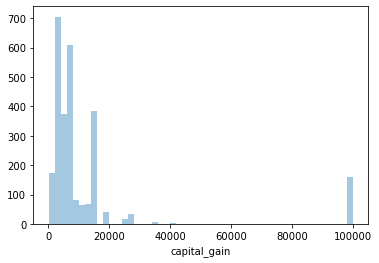

In [30]:
# Repartition pour la variable capital_gain
sns.distplot(df[df.capital_gain > 0].capital_gain, kde=False)

In [31]:
# On recode la variable capital_gain
df_3.loc[df['capital_gain'] == 0, ['capital_gain']] = '0'
df_3.loc[(df['capital_gain'] > 0) & (df['capital_gain'] <= 50000), ['capital_gain']] ='0-50K'
df_3.loc[df['capital_gain'] > 50000, ['capital_gain']] = '50K et +'
df_3['capital_gain'].value_counts()

0           27624
0-50K        2390
50K et +      148
Name: capital_gain, dtype: int64

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital_loss'>

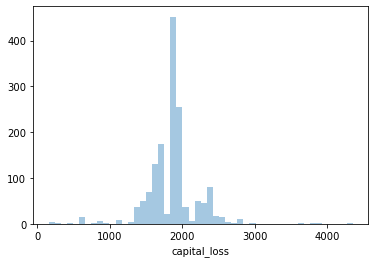

In [32]:
# Repartition pour la variable capital_loss
sns.distplot(df[df.capital_loss > 0].capital_loss, kde=False)

In [33]:
# On recode la variable capital_loss
df_3.loc[df['capital_loss'] == 0, ['capital_loss']] = '0'
df_3.loc[(df['capital_loss'] > 0), ['capital_loss']] ='0-5K'
df_3['capital_loss'].value_counts()

0       28735
0-5K     1427
Name: capital_loss, dtype: int64

In [34]:
df_m = df_3.copy()

## V de cramer 

In [35]:
import itertools
# nominal variables (use Cramer's V)
nom_vars = ['age', 'workclass', 'fnlwgt', 'education','education_num','marital_status','occupation','relationship',
             'race','sex','capital_gain','capital_loss','hours_per_week','income','country']

# convert all string 'object' types to numeric categories
for i in df_3.columns:
    if df_3[i].dtype == 'object':
        df_3[i], _ = pd.factorize(df_3[i])

# A method that creates a correlation matrix in the form of a Pandas DataFrame using Cramer's V.
def cramers_v_matrix(dataframe, variables):
    
    df_3 = pd.DataFrame(index=dataframe[variables].columns,
                      columns=dataframe[variables].columns,
                      dtype="float64")
    
    for v1, v2 in itertools.combinations(variables, 2):
        
        # generate contingency table:
        table = pd.crosstab(dataframe[v1], dataframe[v2])
        n     = len(dataframe.index)
        r, k  = table.shape
        
        # calculate chi squared and phi
        chi2  = ss.chi2_contingency(table)[0]
        phi2  = chi2/n
        
        # bias corrections:
        r = r - ((r - 1)**2)/(n - 1)
        k = k - ((k - 1)**2)/(n - 1)
        phi2 = max(0, phi2 - (k - 1)*(r - 1)/(n - 1))
        
        # fill correlation matrix
        df_3.loc[v1, v2] = np.sqrt(phi2/min(k - 1, r - 1))
        df_3.loc[v2, v1] = np.sqrt(phi2/min(k - 1, r - 1))
        np.fill_diagonal(df_3.values, np.ones(len(df_3)))
        
    return df_3

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


Text(0.5, 1.0, "Cramer's V Correlation")

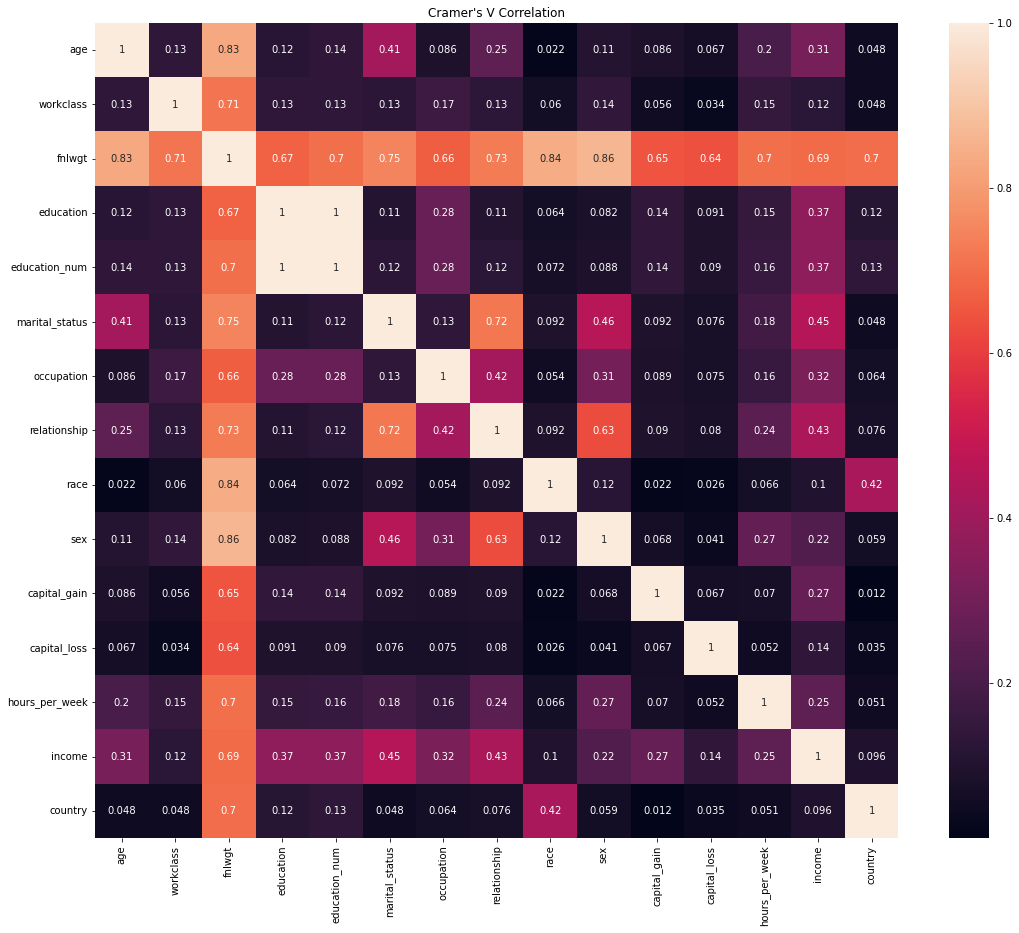

In [36]:
fig, ax = plt.subplots(figsize=(18,15))
# nominal variable correlation
ax1 = sns.heatmap(cramers_v_matrix(df_3, nom_vars), annot=True)
ax1.set_title("Cramer's V Correlation")
        

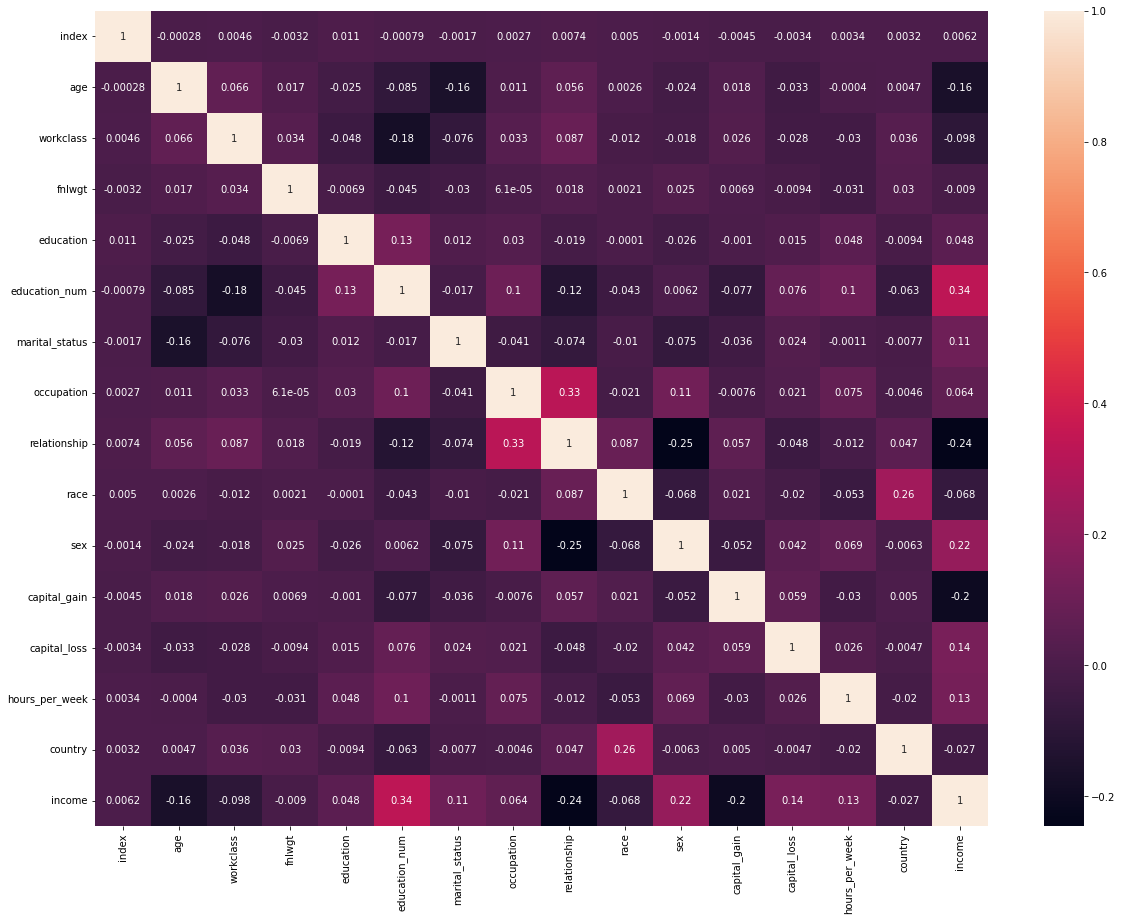

In [37]:
fig,ax=plt.subplots(figsize=(20,15))
ax=sns.heatmap(df_3.corr(),annot=True)

### Que peut-on observé avec les V de cramer ?

Concernant la corrélation avec notre variable à expliquer le salaire, il semble que toutes les variables ont une influence sur cette dernière, bien que la variable 'race' semble être celle avec la moins d'influence.

Corrélation entre les variables à expliquer :
- sex et relationship : 0.65 variable qui a la plus forte corrélation avec le salaire : relationship
- sex et occupation : 0.44 variable qui a la plus forte corrélation avec le salaire : occupation
- relationship et marital_status : 0.49 variable qui a la plus forte corrélation avec le salaire : pareil 
- sex et salary : 0.22

In [38]:
df_4 = df_m.copy()
df_4 = df_4.drop(['fnlwgt','income','index','education_num','relationship','country','sex'] , axis=1) 
#On supprime les variables suite à l'analyse de V de Cramer ainsi que income la variable a expliquer
df_4

,age,workclass,education,marital_status,occupation,race,capital_gain,capital_loss,hours_per_week
0,38-48 ans,Government,Bachelors,Never-married,Adm-clerical,White,0-50K,0,40-45h
1,49-60 ans,Self,Bachelors,Married,Office-employee,White,0,0,Moins de 40h
2,38-48 ans,Private,HS,Not-Married,Physical-work,White,0,0,40-45h
3,49-60 ans,Private,Before-HS,Married,Physical-work,Black,0,0,40-45h
4,17-28 ans,Private,Bachelors,Married,Professional,Black,0,0,40-45h
...,...,...,...,...,...,...,...,...,...
32556,17-28 ans,Private,Assoc,Married,Other,White,0,0,Moins de 40h
32557,38-48 ans,Private,HS,Married,Physical-work,White,0,0,40-45h
32558,49-60 ans,Private,HS,Not-Married,Adm-clerical,White,0,0,40-45h
32559,17-28 ans,Private,HS,Never-married,Adm-clerical,White,0,0,Moins de 40h


## On transforme les variables en variable dummies 

In [39]:
df_3

,index,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,country,income
0,1,0,0,77516,0,13,0,0,0,0,1,0,0,0,0,0
1,2,1,1,83311,0,13,1,1,1,0,1,1,0,1,0,0
2,3,0,2,215646,1,9,2,2,2,0,1,1,0,0,0,0
3,4,1,2,234721,2,7,1,2,1,1,1,1,0,0,0,0
4,5,2,2,338409,0,13,1,3,3,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32557,2,2,257302,5,12,1,5,3,0,0,1,0,1,0,0
32557,32558,0,2,154374,1,9,1,2,1,0,1,1,0,0,0,1
32558,32559,1,2,151910,1,9,2,0,0,0,0,1,0,0,0,0
32559,32560,2,2,201490,1,9,0,0,0,0,1,1,0,1,0,0


In [40]:
df_4 = pd.get_dummies(df_4)
df_4

,age_17-28 ans,age_29-37 ans,age_38-48 ans,age_49-60 ans,age_61 ans et +,workclass_ Private,workclass_Government,workclass_Not-Working,workclass_Self,education_ Prof-school,...,race_ Other,race_ White,capital_gain_0,capital_gain_0-50K,capital_gain_50K et +,capital_loss_0,capital_loss_0-5K,hours_per_week_40-45h,hours_per_week_Moins de 40h,hours_per_week_Plus de 45h
0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,1,0,1,0,1,0,0
1,0,0,0,1,0,0,0,0,1,0,...,0,1,1,0,0,1,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0
32557,0,0,1,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
32558,0,0,0,1,0,1,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
32559,1,0,0,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,1,0


## Echantillonnage

In [41]:
#On ne va pas travailler sur la totalité de nos observations, il est important de réaliser un échantillonnage 
#Train set, Test set
y = df_3['income'] #On défini la variable a expliquer
y=y.astype('int')
X = df_4 # On défini nos features

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.80, test_size=0.20, random_state=0, stratify=y) 
# On réalise l'échantillonage en splitant le datasets a 80% pour le train set et 20% pour le test set
# On initialise un random_state égal à 0 pour obtenir toujours le même tirage aléatoire
# On initialise le paramètre de stratification afin de conserver la répartition par strate

# modélisation

### DecisionTreeClassifier

In [43]:
clf = DecisionTreeClassifier(max_leaf_nodes=10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8279462953754351
f-mesure: 0.8279462953754351
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4531
           1       0.70      0.55      0.61      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.73      0.75      6033
weighted avg       0.82      0.83      0.82      6033



### RandomForest

In [44]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, cross_val_score

#### Recherche des meilleurs paramètres du randomforest et Crossvalidation

In [45]:
model = RandomForestClassifier(criterion='gini', n_estimators=100)
model.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8279462953754351
f-mesure: 0.8279462953754351
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      4531
           1       0.70      0.55      0.61      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.73      0.75      6033
weighted avg       0.82      0.83      0.82      6033



In [46]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4173  358]
 [ 680  822]]


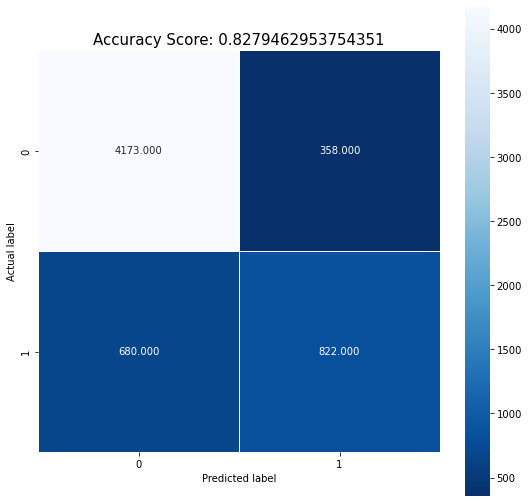

In [47]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### LogisticRegression

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8390518813194099
f-mesure: 0.8390518813194099
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      4531
           1       0.72      0.58      0.64      1502

    accuracy                           0.84      6033
   macro avg       0.79      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4188  343]
 [ 628  874]]


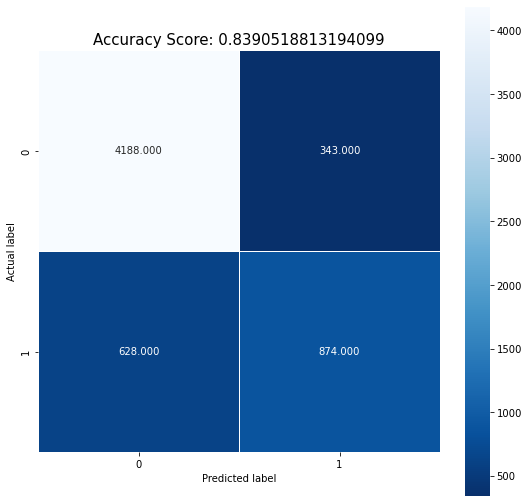

In [50]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [51]:
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test , ns_probs)
lr_auc = roc_auc_score(y_test , y_pred)

In [52]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.753


In [53]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

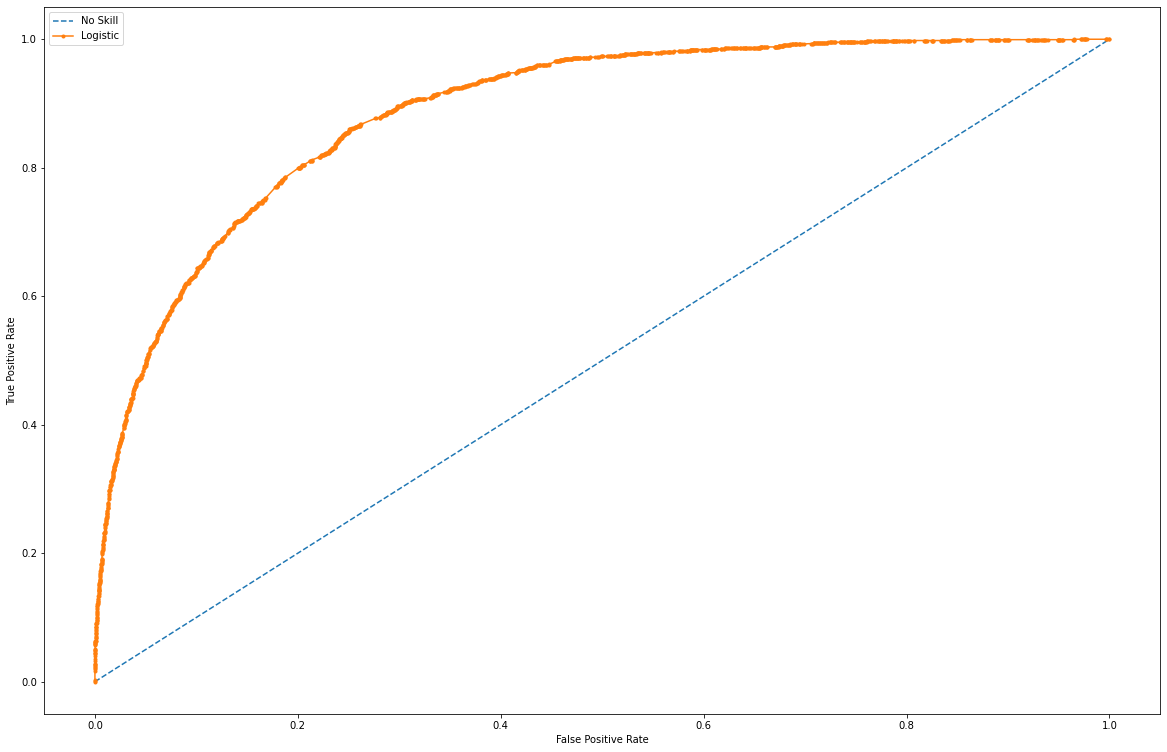

In [54]:
plt.rcParams["figure.figsize"] = (20, 13)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [55]:
print(model.coef_, model.intercept_)

[[-1.0753577   0.03971974  0.4959944   0.57887732  0.01602586  0.35019917
   0.33456354 -0.72886311  0.09936002  1.27786278 -0.39292427  0.28059673
  -1.7587418  -0.45588997  1.34373592 -0.8536648   0.61428502  1.59882937
  -0.89732831 -0.64624144 -0.20581156 -0.30496687  0.52462413  0.37109632
  -0.53880367  0.17753555  0.03158572 -0.1680975   0.16572693  0.22559906
  -0.57413122  0.40616234 -2.16794302 -0.57007044  2.79327307 -0.52189921
   0.57715882  0.09882189 -0.55628009  0.51271781]] [0.1661888]


In [56]:
print("Training set score: {:.3f}".format(model.score(X_train,y_train)))
print("Test set score: {:.3f}".format(model.score(X_test,y_test)))

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Training set score: 0.840
Test set score: 0.839
         Current function value: 0.341219
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                 income   No. Observations:                30162
Model:                          Logit   Df Residuals:                    30129
Method:                           MLE   Df Model:                           32
Date:                Sat, 08 Oct 2022   Pseudo R-squ.:                  0.3919
Time:                        18:07:07   Log-Likelihood:                -10292.
converged:                      False   LL-Null:                       -16925.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
age_17-28 ans                   -0.8006        nan        na

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [57]:
y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: income, Length: 30162, dtype: int32

### KNN

In [58]:
model = KNeighborsClassifier(n_neighbors=10,algorithm='auto',weights='uniform',metric='manhattan')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8242996850654732
f-mesure: 0.8242996850654732
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4531
           1       0.71      0.49      0.58      1502

    accuracy                           0.82      6033
   macro avg       0.78      0.71      0.74      6033
weighted avg       0.81      0.82      0.81      6033



Gain de % d'accuracy grâce aux choix de parâmètre optimal

In [60]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4080  451]
 [ 640  862]]


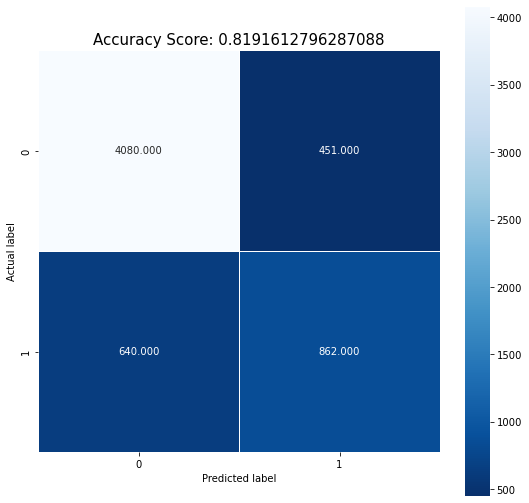

In [61]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## SVM (sector vector machine)

In [62]:
model = LinearSVC(dual=True,loss='squared_hinge',penalty='l2') #Les paramètres par défauts sont les seuls qui fonctionnent ici
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8402121664180342
f-mesure: 0.8402121664180342
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4531
           1       0.73      0.57      0.64      1502

    accuracy                           0.84      6033
   macro avg       0.80      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033



In [63]:
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

[[4208  323]
 [ 641  861]]


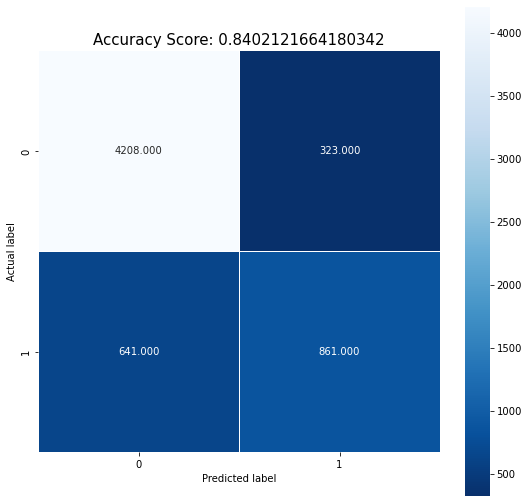

In [64]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

## SGDclassifier (probablement mauvais)

In [65]:
model = SGDClassifier(random_state = 0) 
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8373943311785181
f-mesure: 0.8373943311785181
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4531
           1       0.72      0.57      0.64      1502

    accuracy                           0.84      6033
   macro avg       0.79      0.75      0.77      6033
weighted avg       0.83      0.84      0.83      6033



## GaussianNB

In [66]:
model = GaussianNB() 
#Max iter = nombre d'iteration
#hidden_layer_sizes = nombre de neurones
#activation =fonction d'activation des neurones
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8082214486988232
f-mesure: 0.8082214486988233
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      4531
           1       0.61      0.63      0.62      1502

    accuracy                           0.81      6033
   macro avg       0.74      0.75      0.75      6033
weighted avg       0.81      0.81      0.81      6033



## MLPClassifer (test pour le fun)

In [67]:
model = MLPClassifier(hidden_layer_sizes = 100, max_iter = 1000, activation='logistic') 
#Max iter = nombre d'iteration
#hidden_layer_sizes = nombre de neurones
#activation =fonction d'activation des neurones
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("f-mesure:", metrics.f1_score(y_test, y_pred, average='micro'))
print(metrics.classification_report(y_test, y_pred))
score = metrics.accuracy_score(y_test, y_pred)

Accuracy: 0.8279462953754351
f-mesure: 0.8279462953754351
              precision    recall  f1-score   support

           0       0.86      0.91      0.89      4531
           1       0.69      0.57      0.62      1502

    accuracy                           0.83      6033
   macro avg       0.78      0.74      0.75      6033
weighted avg       0.82      0.83      0.82      6033



C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Youpi 83,7 totalement ininterprétable (c'est pas fou dutout pour un réseau de neurones les données sont pas dingues)